# BEN JACKANY CAPSTONE PROJECT
## FLIGHT DELAYS PREDICTIONS

![fig_01](img/fig_01.png)


### MERGING 2019 DATAFRAMES

### Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import missingno as msno
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
df1= pd.read_csv('../Data/clean_data/2019/df_jan2019.csv')

In [4]:
df2 = pd.read_csv('../Data/clean_data/2019/df_feb2019.csv')

In [5]:
df3 = pd.read_csv('../Data/clean_data/2019/df_march2019.csv')

In [6]:
df4 = pd.read_csv('../Data/clean_data/2019/df_april2019.csv')

In [7]:
df5 = pd.read_csv('../Data/clean_data/2019/df_may2019.csv')

In [8]:
df6 = pd.read_csv('../Data/clean_data/2019//df_june2019.csv')

In [9]:
df7 = pd.read_csv('../Data/clean_data/2019/df_july2019.csv')

In [10]:
df8 = pd.read_csv('../Data/clean_data/2019/df_aug2019.csv')

In [11]:
df9 = pd.read_csv('../Data/clean_data/2019/df_sept2019.csv')

In [12]:
df10 = pd.read_csv('../Data/clean_data/2019/df_oct2019.csv')

In [13]:
df11 = pd.read_csv('../Data/clean_data/2019/df_nov2019.csv')

In [14]:
df12 = pd.read_csv('../Data/clean_data/2019/df_dec2019.csv')

In [15]:
df1.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'DEST', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'FLIGHTS', 'DISTANCE'],
      dtype='object')

In [16]:
df_2019 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [17]:
#df.reset_index(drop=True, inplace=True)

In [18]:
#df_2019.reset_index(drop=True, inplace=True)

In [19]:
#df_2019.to_csv('df_2019final.csv', index= False)

In [20]:
df_2019.shape

(3858536, 25)

In [21]:
df_2019.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE
0,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,MSP,MN,Minnesota,1055,1052.0,-3.0,0.0,0.0,1237.0,-50.0,0.0,0.0,0.0,1.0,1020.0
1,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,PBI,FL,Florida,805,806.0,1.0,1.0,0.0,1058.0,-4.0,0.0,0.0,0.0,1.0,1035.0
2,2019,1,1,4,5,2019-01-04,DL,ATL,GA,Georgia,BNA,TN,Tennessee,826,834.0,8.0,8.0,0.0,825.0,-9.0,0.0,0.0,0.0,1.0,214.0
3,2019,1,1,4,5,2019-01-04,DL,BNA,TN,Tennessee,ATL,GA,Georgia,918,916.0,-2.0,0.0,0.0,1129.0,-1.0,0.0,0.0,0.0,1.0,214.0
4,2019,1,1,4,5,2019-01-04,DL,MCO,FL,Florida,JFK,NY,New York,2035,2040.0,5.0,5.0,0.0,2257.0,-19.0,0.0,0.0,0.0,1.0,944.0


In [22]:
df_2019.shape

(3858536, 25)

In [23]:
df_2019.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'DEST', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'FLIGHTS', 'DISTANCE'],
      dtype='object')

### Let's plot some visualizations

Text(0, 0.5, 'ARRIVAL DELAY')

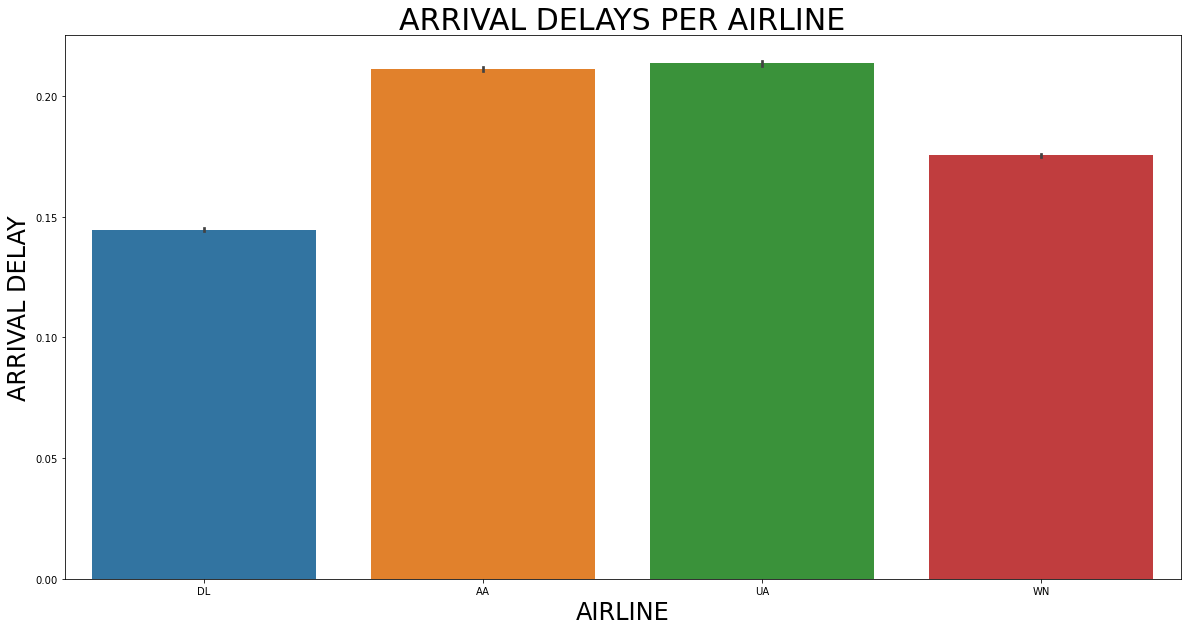

In [27]:
plt.figure(figsize=(20,10))
sns.barplot( data = df_2019, y = 'ARR_DEL15' , x = 'OP_UNIQUE_CARRIER' );
plt.title('ARRIVAL DELAYS PER AIRLINE', fontsize=30)
plt.xlabel('AIRLINE', fontsize=24)
plt.ylabel('ARRIVAL DELAY', fontsize=24)

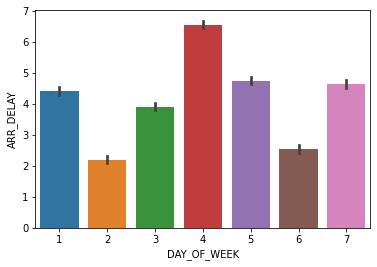

<Figure size 2160x1080 with 0 Axes>

In [90]:
sns.barplot( data = df_2019, y = 'ARR_DELAY' , x = 'DAY_OF_WEEK');

plt.figure(figsize=(30,15));

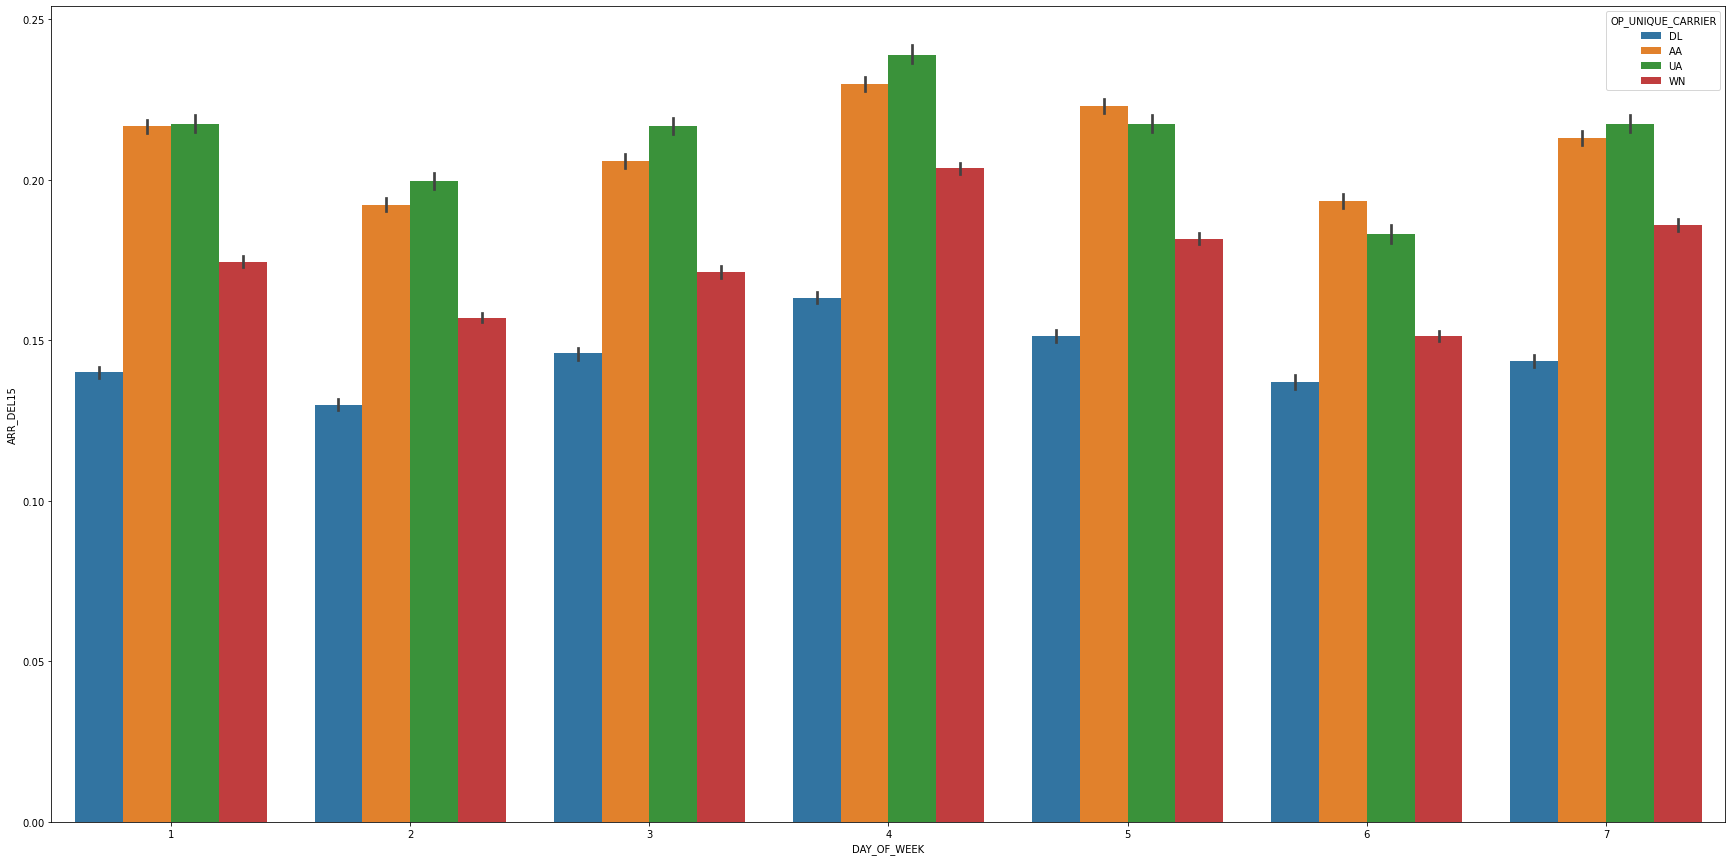

In [28]:
plt.figure(figsize=(30,15));
sns.barplot( data = df_2019, y = 'ARR_DEL15' , x = 'DAY_OF_WEEK', hue = 'OP_UNIQUE_CARRIER' );



## Preprocessing

#### There are 174 unique departures cities and destinations in our dataframe. I will limit my modeling to the top 20 cities. The reason I am doing this is because the DEST feature is categorical column with 174 values. I will do the oneHotencoding for the top 20 destinations

In [92]:
df_2019['DEST'].nunique()

174

In [93]:
df_2019.DEST.value_counts().iloc[:20]

ATL    298366
DFW    165372
DEN    158916
ORD    153476
LAX    144945
PHX    133020
LAS    111108
CLT    109410
SFO     99098
MCO     89108
MSP     86496
BWI     84126
MDW     77086
EWR     74301
IAH     72595
DTW     71776
LGA     71624
DAL     67500
SAN     67085
BOS     66867
Name: DEST, dtype: int64

In [94]:
top_cities = df_2019.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name = 'TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,298366
1,DFW,165372
2,DEN,158916
3,ORD,153476
4,LAX,144945


In [95]:
top_cities.DEST.unique()

array(['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'PHX', 'LAS', 'CLT', 'SFO',
       'MCO', 'MSP', 'BWI', 'MDW', 'EWR', 'IAH', 'DTW', 'LGA', 'DAL',
       'SAN', 'BOS'], dtype=object)

In [96]:
#df_dl = df[df['OP_UNIQUE_CARRIER'] == 'DL']

dfm_dl = df_2019[df_2019['OP_UNIQUE_CARRIER'] == 'DL']

In [97]:
dfm_dl['DEST'].nunique()

154

In [98]:
dfm_dl.DEST.value_counts().iloc[:20]

ATL    243201
MSP     68287
DTW     59583
SLC     46911
LAX     36435
JFK     32250
SEA     30524
LGA     27910
MCO     18611
BOS     18426
SFO     15202
LAS     13806
ORD     13258
DEN     11900
TPA     11667
FLL     11203
DFW     10140
RDU     10003
DCA      9468
SAN      8912
Name: DEST, dtype: int64

In [99]:
top_cities_dl = dfm_dl.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name = 'TOTAL_FLIGHTS')
top_cities_dl.head()

,DEST,TOTAL_FLIGHTS
0,ATL,243201
1,MSP,68287
2,DTW,59583
3,SLC,46911
4,LAX,36435


In [100]:
top_cities_dl.DEST.unique()

array(['ATL', 'MSP', 'DTW', 'SLC', 'LAX', 'JFK', 'SEA', 'LGA', 'MCO',
       'BOS', 'SFO', 'LAS', 'ORD', 'DEN', 'TPA', 'FLL', 'DFW', 'RDU',
       'DCA', 'SAN'], dtype=object)

In [101]:
# creating a list with top 20 cities only:
city_list_dl = top_cities_dl['DEST'].tolist()

In [102]:
city_list_dl

['ATL',
 'MSP',
 'DTW',
 'SLC',
 'LAX',
 'JFK',
 'SEA',
 'LGA',
 'MCO',
 'BOS',
 'SFO',
 'LAS',
 'ORD',
 'DEN',
 'TPA',
 'FLL',
 'DFW',
 'RDU',
 'DCA',
 'SAN']

In [103]:
boolean_series = dfm_dl.DEST.isin(city_list_dl)
dfm_dl_2019 = dfm_dl[boolean_series]

In [104]:
dfm_dl_2019.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'DEST', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'FLIGHTS', 'DISTANCE'],
      dtype='object')

In [105]:
dfm_dl_2019.DEST.value_counts()

ATL    243201
MSP     68287
DTW     59583
SLC     46911
LAX     36435
JFK     32250
SEA     30524
LGA     27910
MCO     18611
BOS     18426
SFO     15202
LAS     13806
ORD     13258
DEN     11900
TPA     11667
FLL     11203
DFW     10140
RDU     10003
DCA      9468
SAN      8912
Name: DEST, dtype: int64

In [106]:
dfm_dl_2019.shape

(697697, 25)

After choosing the top 20 cities, the size of my dataframe to analyze delta's flights has reduced by less than 30% which is ok compared to having 154 columns.
Before this dataframe is saved I need to review the type of each columns and try to minimize the categoricals when possible. The reason for this is because as we know a categorical variable is a variable whose values take on the value of labels and Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model

So lets see first which ones I have to deal with:

In [107]:
dfm_dl_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697697 entries, 0 to 81403
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               697697 non-null  int64  
 1   QUARTER            697697 non-null  int64  
 2   MONTH              697697 non-null  int64  
 3   DAY_OF_MONTH       697697 non-null  int64  
 4   DAY_OF_WEEK        697697 non-null  int64  
 5   FL_DATE            697697 non-null  object 
 6   OP_UNIQUE_CARRIER  697697 non-null  object 
 7   ORIGIN             697697 non-null  object 
 8   ORIGIN_STATE_ABR   697697 non-null  object 
 9   ORIGIN_STATE_NM    697697 non-null  object 
 10  DEST               697697 non-null  object 
 11  DEST_STATE_ABR     697697 non-null  object 
 12  DEST_STATE_NM      697697 non-null  object 
 13  CRS_DEP_TIME       697697 non-null  int64  
 14  DEP_TIME           697697 non-null  float64
 15  DEP_DELAY          697697 non-null  float64
 16  DEP

In [108]:
dfm_dl_2019.head(2)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,FLIGHTS,DISTANCE
0,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,MSP,MN,Minnesota,1055,1052.0,-3.0,0.0,0.0,1237.0,-50.0,0.0,0.0,0.0,1.0,1020.0
3,2019,1,1,4,5,2019-01-04,DL,BNA,TN,Tennessee,ATL,GA,Georgia,918,916.0,-2.0,0.0,0.0,1129.0,-1.0,0.0,0.0,0.0,1.0,214.0


In [109]:
dfm_dl_2019['FLIGHTS'].nunique()

1

In [110]:
dfm_dl_2019['DEST'].nunique()

20

In [111]:
dfm_dl_2019.shape

(697697, 25)

In [112]:
#dfm_dl_2019.to_csv('dfm_dl_2019.csv', index = False)

first step is to get rid of of columns that I won't be using, thus I did some research to find out what are the real reasons flight are delayed. source: <a href="https://www.claimcompass.eu/blog/why-is-my-flight-delayed/">Link</a>

### Data Engineering and Modeling

### A delayed flight is a flight that is delayed 15 minutes or more. The ARR_DEL15 column show a zero when the flight is not delayed and 1 when the flight is delayed

In [113]:
# this means for the top 20 arrival cities, DL is late only 15% of the time. The vast majority of flight arrive on time
dfm_dl_2019['ARR_DEL15'].value_counts(normalize= True) 

0.0    0.851619
1.0    0.148381
Name: ARR_DEL15, dtype: float64

### Let's rename ARR_DEL15:FLIGHT_STATUS

In [114]:
#new_data = data.rename(columns = {'State': 'state','Participation': 'participation',})

dfm_dl_2019 = dfm_dl_2019.rename(columns = {'ARR_DEL15': 'FLIGHT_STATUS'})

In [115]:
dfm_dl_2019.head(2)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,FLIGHT_STATUS,CANCELLED,FLIGHTS,DISTANCE
0,2019,1,1,4,5,2019-01-04,DL,LGA,NY,New York,MSP,MN,Minnesota,1055,1052.0,-3.0,0.0,0.0,1237.0,-50.0,0.0,0.0,0.0,1.0,1020.0
3,2019,1,1,4,5,2019-01-04,DL,BNA,TN,Tennessee,ATL,GA,Georgia,918,916.0,-2.0,0.0,0.0,1129.0,-1.0,0.0,0.0,0.0,1.0,214.0


### Let's get rid of the columns we wont' be using

In [116]:
dfm_dl_2019 = dfm_dl_2019.drop(columns = ['YEAR', 'FL_DATE', 'ORIGIN_STATE_NM', 'DEST_STATE_NM', 'CRS_DEP_TIME', 
                                        'DEP_TIME','CRS_DEP_TIME','DEP_TIME','DEP_DEL15','ARR_TIME','CANCELLED',
                                        'FLIGHTS', 'DEP_DELAY','DEP_DELAY_NEW', 'ARR_DELAY','ARR_DELAY_NEW','QUARTER','DAY_OF_MONTH'])

In [117]:
dfm_dl_2019.head(2)

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,FLIGHT_STATUS,DISTANCE
0,1,5,DL,LGA,NY,MSP,MN,0.0,1020.0
3,1,5,DL,BNA,TN,ATL,GA,0.0,214.0


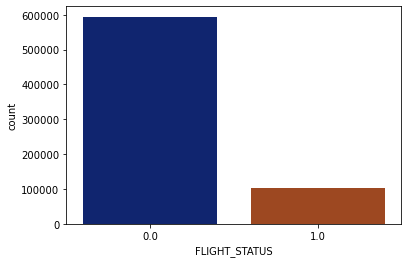

In [118]:
sns.countplot(x="FLIGHT_STATUS", palette="dark", data=dfm_dl_2019);

In [119]:
dfm_dl_2019['FLIGHT_STATUS'].value_counts(normalize= True)

0.0    0.851619
1.0    0.148381
Name: FLIGHT_STATUS, dtype: float64

### Our classes are imbalanced, and the ratio of on-time arrivals  to delay flights is 85:15. Before we go ahead to balance the classes, let’s do some more exploration.

In [120]:
dfm_dl_2019.corr()

,MONTH,DAY_OF_WEEK,FLIGHT_STATUS,DISTANCE
MONTH,1.000000,0.010652,-0.010900,-0.003104
DAY_OF_WEEK,0.010652,1.000000,0.002508,0.009729
FLIGHT_STATUS,-0.010900,0.002508,1.000000,0.025740
DISTANCE,-0.003104,0.009729,0.025740,1.000000


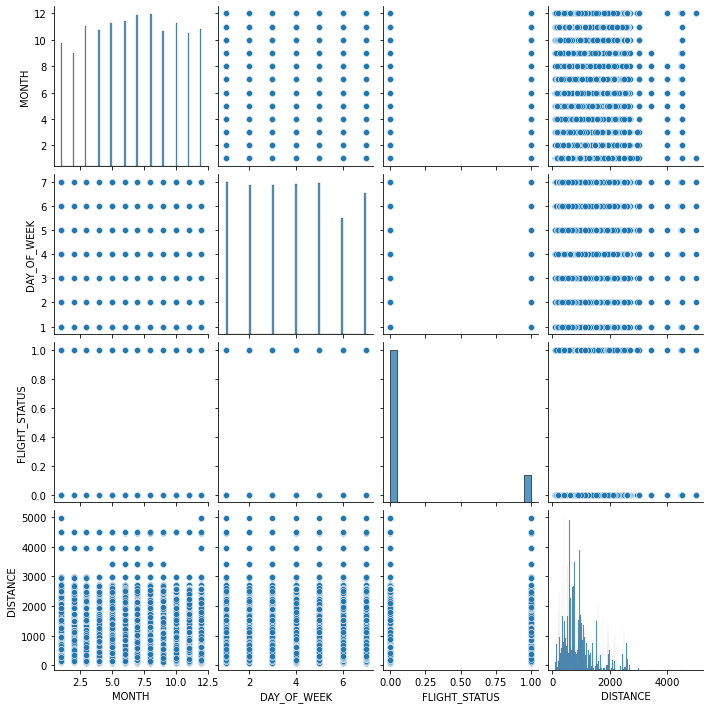

In [121]:
sns.pairplot(dfm_dl_2019)

In [122]:
dfm_dl_2019.shape

(697697, 9)

In [123]:
dfm_dl_2019.head()

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,FLIGHT_STATUS,DISTANCE
0,1,5,DL,LGA,NY,MSP,MN,0.0,1020.0
3,1,5,DL,BNA,TN,ATL,GA,0.0,214.0
4,1,5,DL,MCO,FL,JFK,NY,0.0,944.0
5,1,5,DL,SLC,UT,ATL,GA,0.0,1590.0
6,1,5,DL,PHX,AZ,ATL,GA,0.0,1587.0


In [124]:
dfm_dl_2019.dtypes

MONTH                  int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
ORIGIN                object
ORIGIN_STATE_ABR      object
DEST                  object
DEST_STATE_ABR        object
FLIGHT_STATUS        float64
DISTANCE             float64
dtype: object

In [128]:
 #dfm_dl_2019[["MONTH ", "DAY_OF_WEEK"]] = dfm_dl_2019[["MONTH ", "DAY_OF_WEEK"]].astype(str) 

In [129]:
dfm_dl_2019['MONTH'] = dfm_dl_2019['MONTH'].apply(str)

In [130]:
dfm_dl_2019['DAY_OF_WEEK'] = dfm_dl_2019['DAY_OF_WEEK'].apply(str)

In [131]:
dfm_dl_2019.dtypes

MONTH                 object
DAY_OF_WEEK           object
OP_UNIQUE_CARRIER     object
ORIGIN                object
ORIGIN_STATE_ABR      object
DEST                  object
DEST_STATE_ABR        object
FLIGHT_STATUS        float64
DISTANCE             float64
dtype: object

In [133]:
dfm_dl_2019

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,FLIGHT_STATUS,DISTANCE
0,1,5,DL,LGA,NY,MSP,MN,0.0,1020.0
3,1,5,DL,BNA,TN,ATL,GA,0.0,214.0
4,1,5,DL,MCO,FL,JFK,NY,0.0,944.0
5,1,5,DL,SLC,UT,ATL,GA,0.0,1590.0
6,1,5,DL,PHX,AZ,ATL,GA,0.0,1587.0
...,...,...,...,...,...,...,...,...,...
81398,12,4,DL,BOS,MA,MSP,MN,0.0,1124.0
81399,12,4,DL,SLC,UT,MSP,MN,0.0,991.0
81401,12,4,DL,PVD,RI,ATL,GA,0.0,903.0
81402,12,4,DL,ATL,GA,ORD,IL,0.0,606.0


In [134]:
df = pd.get_dummies(dfm_dl_2019, drop_first= True)

In [135]:
df

,FLIGHT_STATUS,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,0.0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [142]:
df.to_csv('dfm.csv', index = False)

In [136]:
dfm_dl_2019['ORIGIN_STATE_ABR'].nunique()

51

In [138]:
X = df.drop(columns ='FLIGHT_STATUS')

In [139]:
y = df['FLIGHT_STATUS']

In [140]:
X.shape

(697697, 254)

In [141]:
y.shape

(697697,)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= .2,  random_state=42)

In [89]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
#examine train and test scores
print(f'The training accuracy is {LogReg.score(X_train, y_train)}')
print(f'The testing accuracy is {LogReg.score(X_test, y_test)}')

The training accuracy is 0.8514539815858262
The testing accuracy is 0.8522789164397305


In [93]:
print(X_train.shape)
print(X_test.shape)

(558157, 241)
(139540, 241)


In [97]:
print(y_train.shape)
print(y_test.shape)

(558157,)
(139540,)


In [98]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
model = RandomForestClassifier(n_estimators= 100, criterion='gini', max_leaf_nodes= 16, n_jobs= -1)
model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_jobs=-1)

In [143]:
predicted = model.predict(X_test)
model.score(X_test, y_test)

0.8522789164397305

The mean accuracy is 85% which is not bad however mean accuracy is not always a reliable indicator of the accuracy of a classification model. Let's dig a liitle deeper and determine how accurate the model really is. Let's find the ROC AUC ( Area under receiver operating characteristic Curve ). Before we do that let's generate prediction probabilities for the test set.

In [132]:
X_test.shape

(139540, 241)

In [144]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(X_test)

In [145]:
roc_auc_score(y_test, probabilities[:,1])

0.6149586295108691

The output from the score method reflects how many of the items in the test set the model predicted correctly. This score is skewed by the fact that in the dataset the model was trained and tested with more rows/information representing on time arrivals than late arrivals. because of this imblanace data, we re more likely to be correct predicting a flight hat will be on time than predicting late flight

ROC takes this into account and provides a more accurate indication of how likely it is that a prediction of on time or late will be correct.

We can learn more about the model's behaviour by generating a confusion matrix.

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[118927,      0],
       [ 20613,      0]])

In [136]:
from sklearn.metrics import precision_score

In [137]:
train_predictions = model.predict(X_train)
precision_score(y_train, train_predictions)

/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [139]:
from sklearn.metrics import f1_score

In [153]:
f1_score(y_test,predicted, labels=np.unique(predicted))

0.0

In [129]:
from sklearn.metrics import recall_score

recall_score(y_train, train_predictions)

0.0